In [1]:
%matplotlib inline

In [2]:
from pprint import pprint

import datetime

import pymc
import numpy as np
import spacepy.plot as spp # for the style
import matplotlib.pyplot as plt
import spacepy.toolbox as tb
import spacepy.plot as spp


This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
print(datetime.datetime.now())

2016-09-08 17:44:54.453616


In [10]:
# test data

case = {
    'a':[31., 1., 1.], 
#     'b':[60.,20.,1.], 
#     'c':[60.,1.,1/30], 
#     'd':[60.,3000., 100.], 
#     'e':[170.,172.,1.]
}


In [22]:
fg = [31, 34, 32, 60]
bk = [1, 2, 1, 20]
C = [1,1,1]

In [34]:
#priors
s = pymc.Uniform('s', 0.0, 1e4)
bkg = pymc.Uniform('bkg', 0, 1e4, size=4)

# model
obstot = pymc.Poisson('obstot', s+bkg/case[c][2], observed=True, value=fg)
obsbkg = pymc.Poisson('obsbkg', bkg, observed=True, value=bk)

model = pymc.MCMC((s, bkg, obstot, obsbkg))
model.sample(50000, 1000, burn_till_tuned=True, thin=40, progress_bar=True)
# print()
# print('{0}    {1:.2}    {2:.2}    {3:.2}    {4:.2} +/- {5:.2}     {6:.2} +/- {7:.2}'.format(c, 
#                                                                       case[c][0], 
#                                                                       case[c][1], 
#                                                                       case[c][2], 
#                                                                       bkg.stats()['mean']*case[c][2], 
#                                                                       bkg.stats()['standard deviation']*case[c][2], 
#                                                                       s.stats()['mean'], 
#                                                                       s.stats()['standard deviation'], 
#                                                                       ))


 [-----------------------------------197%------------------------------------] 106764 of 54000 complete in 13.0 secHalting at iteration  110762  of  164000


Plotting bkg_0
Plotting bkg_1
Plotting bkg_2
Plotting bkg_3
Plotting s


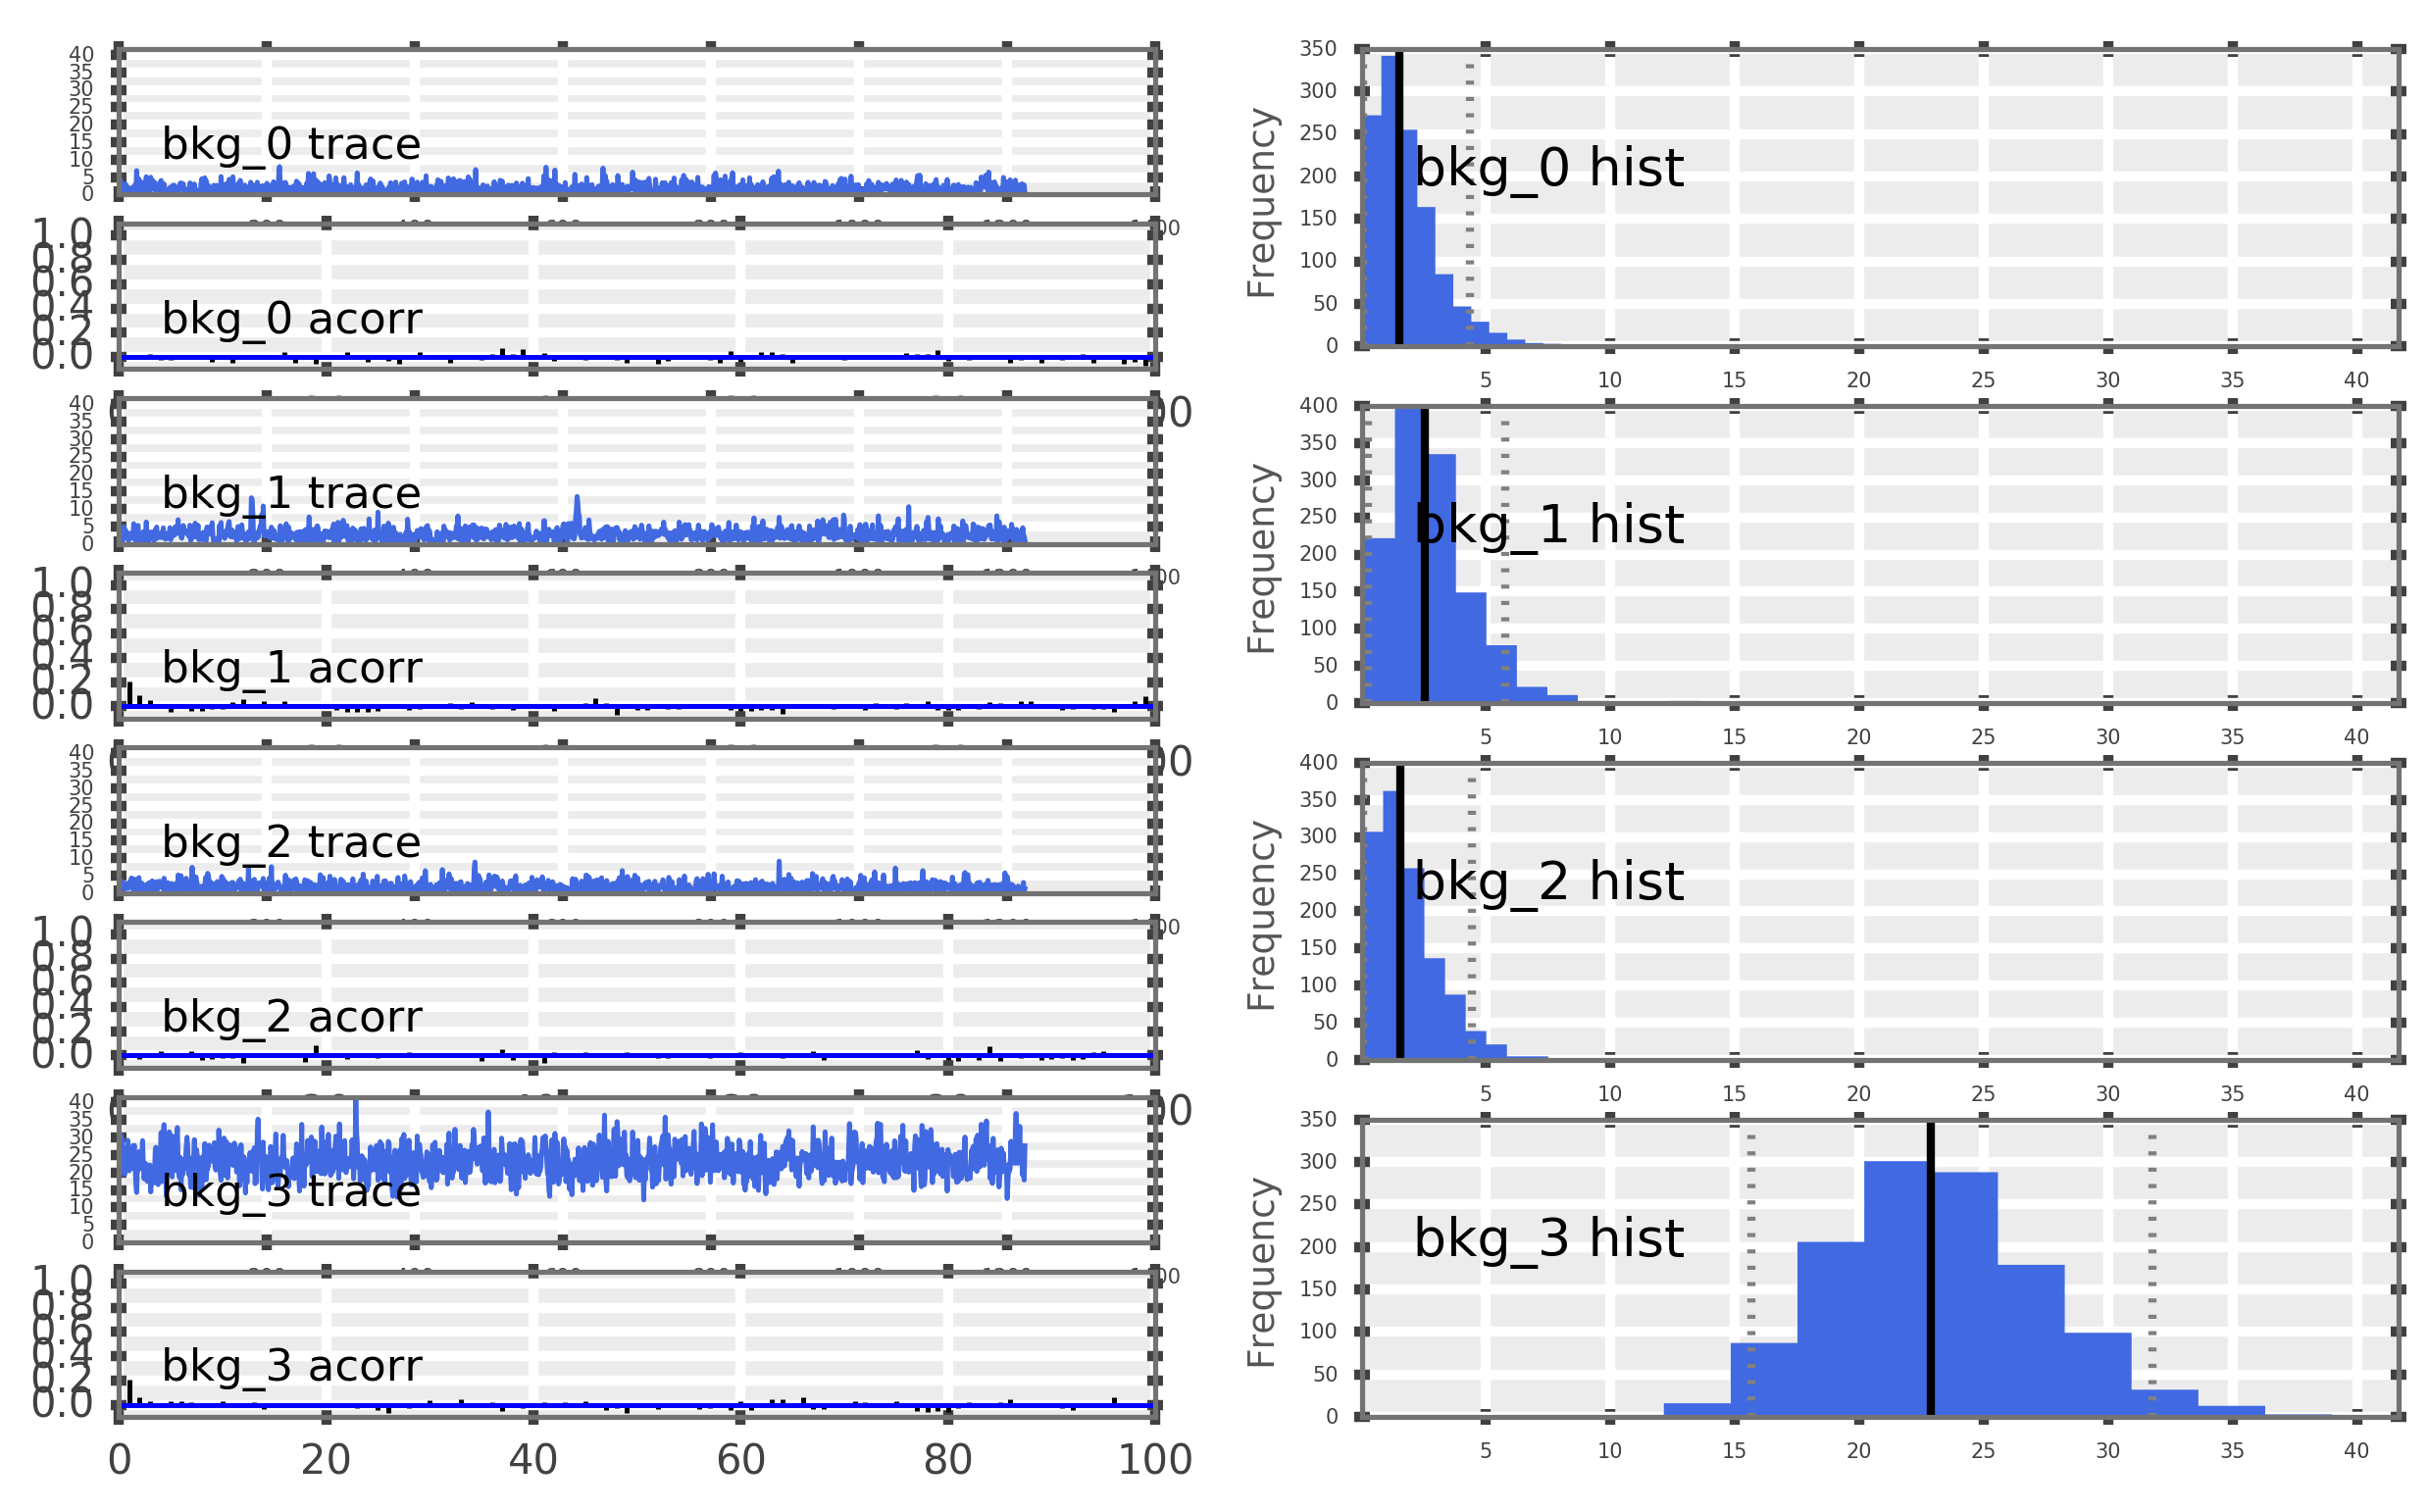

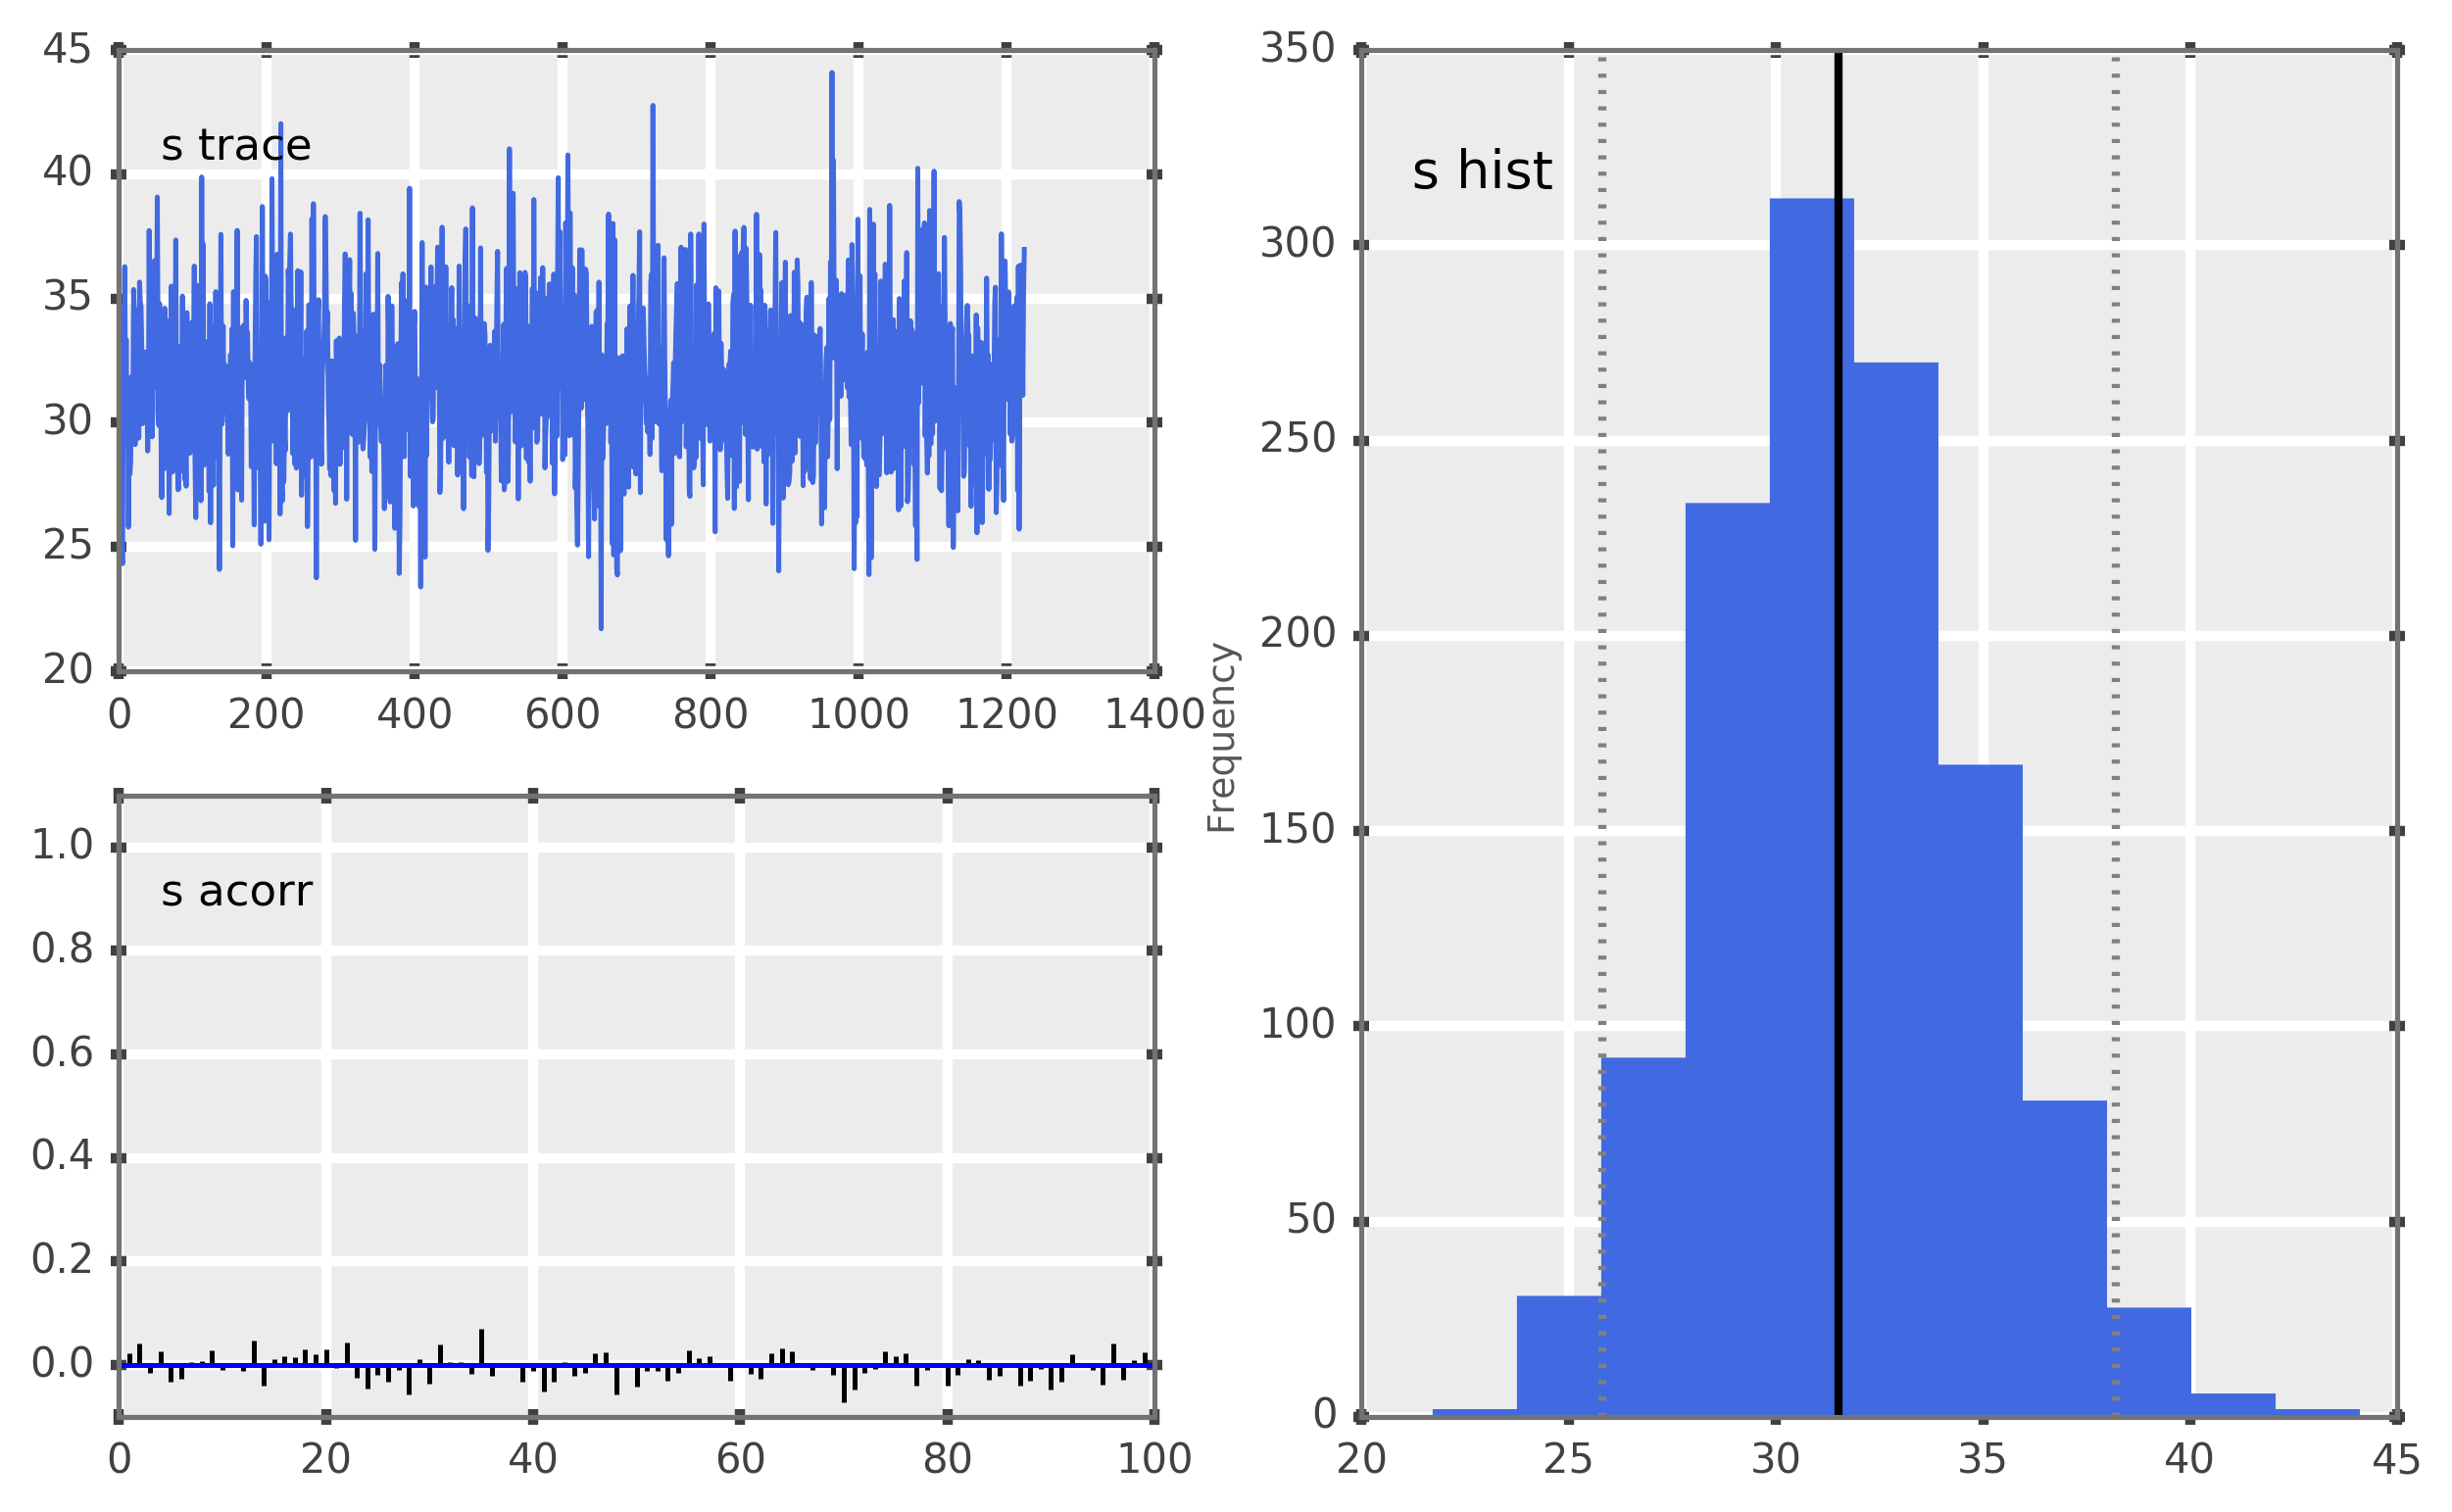

In [32]:
pymc.Matplot.plot(model)


In [44]:
for i in range(10):
    print(pymc.Binomial('a', 1, 0.99).value)

1
1
1
1
1
1
1
1
1
1
